In [115]:
import pandas as pd
import altair as alt
from pathlib import Path
from pyprojroot import here

In [116]:
df_path = here('./data/raw/ecdc/COVID-19-geographic-disbtribution-worldwide-2020-03-14_1.xls')
df = pd.read_excel(df_path)
df['Country'] = df.CountryExp.str.capitalize()
df['TotalCases'] = df.iloc[::-1].groupby('Country')['NewConfCases'].transform(pd.Series.cumsum)
df['TotalDeaths'] = df.iloc[::-1].groupby('Country')['NewDeaths'].transform(pd.Series.cumsum)

countries = ['Italy', 'Austria', 'France', 'Spain', 'Germany', 'Switzerland']

In [117]:
from altair import datum

alt.Chart(df[(df.CountryExp.isin(countries))]).mark_line().encode(
    alt.Y('TotalCases', scale=alt.Scale(type='log')),
    alt.X('DateRep:T', axis = alt.Axis(title = 'Date', format = ("%d.%m"))),
    color='Country',
    tooltip=['Country', 'DateRep', 'TotalCases']
).properties(
    height=600,
    width=800
).transform_filter(
    (datum.NewConfCases > 10)
).interactive()

alt.Chart(...)

In [118]:
alt.Chart(df[(df.CountryExp.isin(countries))]).mark_line().encode(
    alt.Y('TotalDeaths'),
    alt.X('DateRep:T', axis = alt.Axis(title = 'Date', format = ("%d.%m"))),
    color='Country',
    tooltip=['Country', 'DateRep', 'TotalDeaths']
).properties(
    height=600,
    width=800
).transform_filter(
    (datum.NewConfCases > 2)
).interactive()

alt.Chart(...)

Text(0, 35000, 'Confirmed cases since start of the epidemic for different european countries')

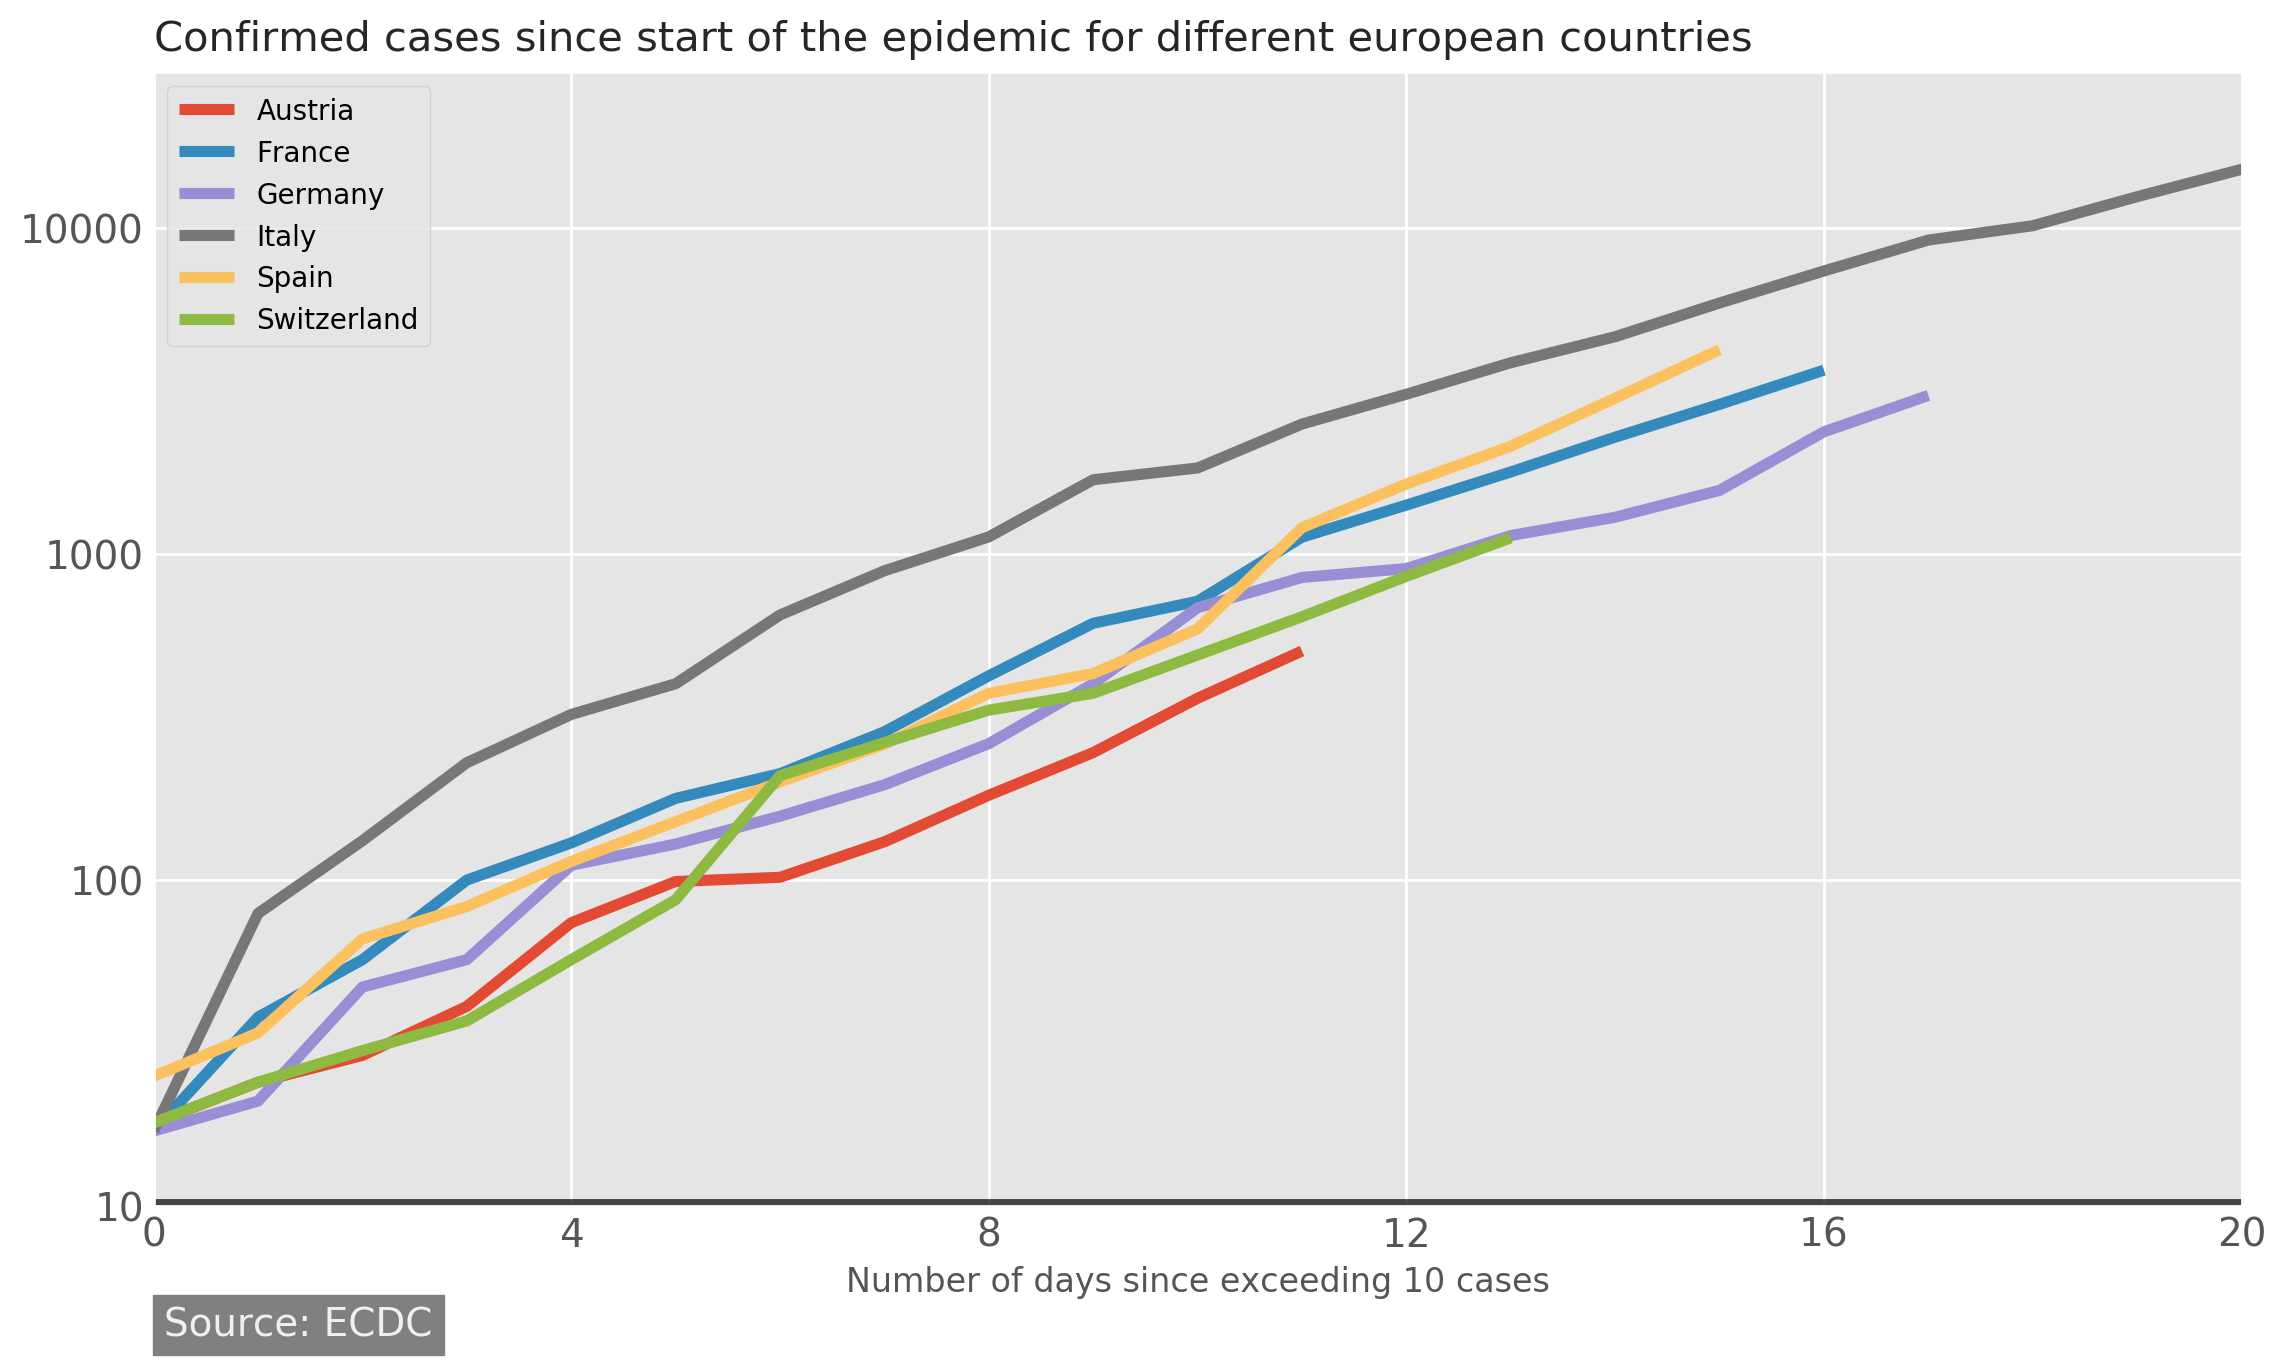

In [114]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(12,7))

for g, n in df[df.TotalCases > 15].iloc[::-1].groupby('CountryExp')['TotalCases']:
    if g in countries:
        xrange = range(len(n))
        ax.semilogy(xrange, n, label=g)

ax.legend()
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.set_xlabel('Number of days since exceeding 10 cases')
ax.set_xticks(range(0, 21, 4))
ax.set_xlim([0, 20])
ax.set_ylim([10, 30000])
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.axhline(y = 10, color = 'black', linewidth = 5, alpha = .7)
ax.text(x = 0.1, y = 4,
    s = 'Source: ECDC',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
ax.text(x = 0, y = 35000,
               s = 'Confirmed cases since start of the epidemic for different european countries',
              fontsize = 15, alpha = .85)

In [59]:
alt.Chart(df[(df.CountryExp.isin(countries))]).mark_line().encode(
    alt.Y('TotalCases', scale=alt.Scale(type='log')),
    alt.X('DateRep:T', axis = alt.Axis(title = 'Date', format = ("%d.%m"))),
    color='CountryExp',
    tooltip=['CountryExp', 'DateRep', 'TotalCases']
).properties(
    height=600,
    width=800
).transform_filter(
    (datum.NewConfCases > 10)
).interactive()

alt.Chart(...)